./BM/mybench_small_read.csv
./VM/mybench_small_read.csv
./VM_sym/mybench_small_read.csv
./BM/mybench_small_write.csv
./VM/mybench_small_write.csv
./VM_sym/mybench_small_write.csv
./BM/mybench_small_munmap.csv
./VM/mybench_small_munmap.csv
./VM_sym/mybench_small_munmap.csv
./BM/mybench_small_pagefault.csv
./VM/mybench_small_pagefault.csv
./VM_sym/mybench_small_pagefault.csv


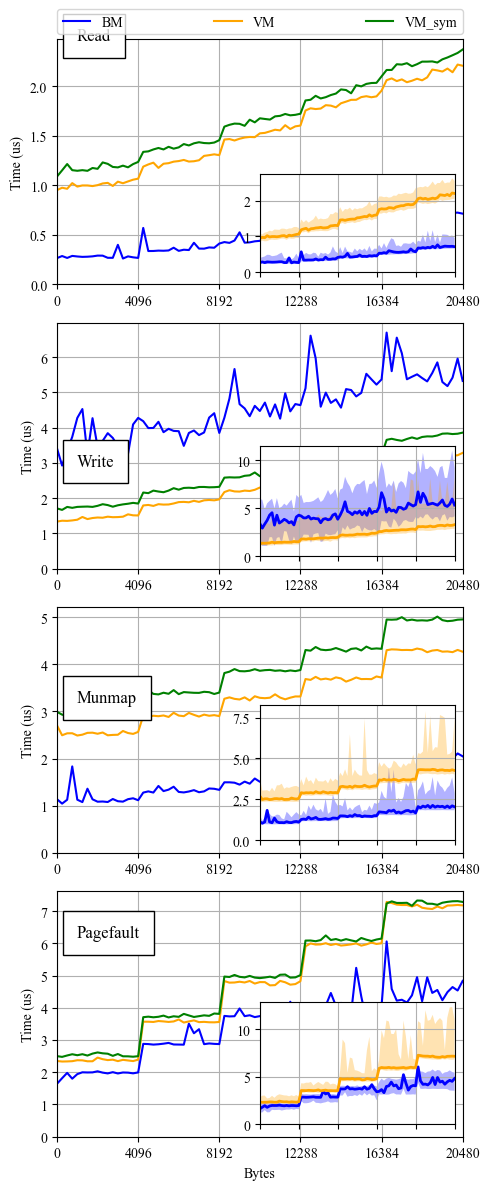

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

fig, [ax1, ax2, ax3, ax4] = plt.subplots(4,1,figsize=(5,12), dpi= 100, facecolor='w', \
                       edgecolor='k')

dirs = ["BM","VM", "VM_sym" , "BM_sym"]
sizes = np.arange(256, 20490, 256)
xtix = np.arange(0, 20490, 4096)
sizes = np.insert(sizes, 0 ,1)
colors = ['blue', 'orange', 'green', 'purple', 'teal', 'red']
markers = ["|", ",", ",", ",", ",", "X"]
lstyles = ['solid', 'dotted', 'dotted', 'dashed', 'dashdot', 'dotted']

#---------------------------------
#---------------------------------

testname = 'read'
#plt.figure("main", figsize=(5,4), dpi= 100, facecolor='w', edgecolor='k')
#ax = plt.gca()
axs1 = ax1.inset_axes([0.5, 0.05, 0.48, 0.4])
for d in dirs:
    normalArr = np.empty((0,5), float)
    filename = "./"+ d + "/mybench_small_" + testname + ".csv"
    print(filename)
    tmp = pd.read_csv(filename)
    for i in np.nditer(sizes):
        col = tmp.loc[tmp["Size"] == i, "Latency"]
        col = col.mul(1000000)
        newArr = np.array([[np.mean(col), np.std(col), np.percentile(col, 90), np.percentile(col, 99), \
                            np.amin(col)]])
        normalArr = np.append(normalArr, newArr, axis=0)
    ax1.plot(sizes, normalArr[:,0], label=d, linewidth=1.5, \
                 color=colors[dirs.index(d)])#, linestyle = lstyles[dirs.index(d)])#, \
                 #marker=markers[dirs.index(d)])
    if d == "BM" or d == "VM":
        axs1.fill_between(sizes, normalArr[:,4], normalArr[:,3], \
                         facecolor=colors[dirs.index(d)], \
                         alpha=0.3)
        axs1.plot(sizes, normalArr[:,0], label=d, linewidth=2, \
             color=colors[dirs.index(d)])
axs1.grid()
axs1.set_xlim(0,20480)
axs1.set_ylim(0)
ax1.set_xlim(xmin=0)
#ax1.set_xlabel("Bytes")
ax1.set_ylabel("Time (us)")
ax1.set_ylim(ymin=0)
ax1.set_xlim(xmax=20480)
ax1.set_xticks(xtix)
axs1.set_xticks(xtix)
axs1.set_xticklabels([])
ax1.legend(bbox_to_anchor=(0,1.02,1,0.2),loc="lower left",
            mode="expand", borderaxespad=0, ncol=3)
ax1.grid()
ax1.text(1000,2.47,'Read', fontsize = 12, color = 'black', \
        bbox=dict(facecolor='white', edgecolor='black', pad=10.0))

#---------------------------------
#---------------------------------

testname = 'write'
#plt.figure("main", figsize=(5,4), dpi= 100, facecolor='w', edgecolor='k')
#ax = plt.gca()
axs2 = ax2.inset_axes([0.5, 0.05, 0.48, 0.45])
for d in dirs:
    normalArr = np.empty((0,5), float)
    filename = "./"+ d+"/mybench_small_" + testname + ".csv"
    print(filename)
    tmp = pd.read_csv(filename)
    for i in np.nditer(sizes):
        col = tmp.loc[tmp["Size"] == i, "Latency"]
        col = col.mul(1000000)
        newArr = np.array([[np.mean(col), np.std(col), np.percentile(col, 90), np.percentile(col, 99), \
                            np.amin(col)]])
        normalArr = np.append(normalArr, newArr, axis=0)
    ax2.plot(sizes, normalArr[:,0], label=d, linewidth=1.5, \
                 color=colors[dirs.index(d)])#, linestyle = lstyles[dirs.index(d)])#, \
                 #marker=markers[dirs.index(d)])
    if d == "BM" or d == "VM":
        axs2.fill_between(sizes, normalArr[:,4], normalArr[:,3], \
                         facecolor=colors[dirs.index(d)], \
                         alpha=0.3)
        axs2.plot(sizes, normalArr[:,0], label=d, linewidth=2, \
             color=colors[dirs.index(d)])
axs2.grid()
axs2.set_xlim(0,20480)
axs2.set_ylim(0)
ax2.set_xlim(xmin=0)
#ax1.set_xlabel("Bytes")
ax2.set_ylabel("Time (us)")
ax2.set_ylim(ymin=0)
ax2.set_xlim(xmax=20480)
ax2.set_xticks(xtix)
axs2.set_xticks(xtix)
axs2.set_xticklabels([])
#ax2.legend(bbox_to_anchor=(0,1.02,1,0.2),loc="lower left",
#            mode="expand", borderaxespad=0, ncol=3)
ax2.grid()
ax2.text(1000,2.92,'Write', fontsize = 12, color = 'black', \
        bbox=dict(facecolor='white', edgecolor='black', pad=10.0))

#---------------------------------
#---------------------------------

testname = 'munmap'
#plt.figure("main", figsize=(5,4), dpi= 100, facecolor='w', edgecolor='k')
#ax = plt.gca()
axs3 = ax3.inset_axes([0.5, 0.05, 0.48, 0.55])
for d in dirs:
    normalArr = np.empty((0,5), float)
    filename = "./"+d+"/mybench_small_" + testname + ".csv"
    print(filename)
    tmp = pd.read_csv(filename)
    for i in np.nditer(sizes):
        col = tmp.loc[tmp["Size"] == i, "Latency"]
        col = col.mul(1000000)
        newArr = np.array([[np.mean(col), np.std(col), np.percentile(col, 90), np.percentile(col, 99), \
                            np.amin(col)]])
        normalArr = np.append(normalArr, newArr, axis=0)
    ax3.plot(sizes, normalArr[:,0], label=d, linewidth=1.5, \
                 color=colors[dirs.index(d)])#, linestyle = lstyles[dirs.index(d)])#, \
                 #marker=markers[dirs.index(d)])
    if d == "BM" or d == "VM":
        axs3.fill_between(sizes, normalArr[:,4], normalArr[:,3], \
                         facecolor=colors[dirs.index(d)], \
                         alpha=0.3)
        axs3.plot(sizes, normalArr[:,0], label=d, linewidth=2, \
             color=colors[dirs.index(d)])
axs3.grid()
axs3.set_xlim(0,20480)
axs3.set_ylim(0)
ax3.set_xlim(xmin=0)
#ax1.set_xlabel("Bytes")
ax3.set_ylabel("Time (us)")
ax3.set_ylim(ymin=0)
ax3.set_xlim(xmax=20480)
ax3.set_xticks(xtix)
axs3.set_xticks(xtix)
axs3.set_xticklabels([])
#ax1.legend(bbox_to_anchor=(0,1.02,1,0.2),loc="lower left",
#            mode="expand", borderaxespad=0, ncol=3)
ax3.grid()
ax3.text(1000,3.2,'Munmap', fontsize = 12, color = 'black', \
        bbox=dict(facecolor='white', edgecolor='black', pad=10.0))

#---------------------------------
#---------------------------------

testname = 'pagefault'
#plt.figure("main", figsize=(5,4), dpi= 100, facecolor='w', edgecolor='k')
#ax = plt.gca()
axs4 = ax4.inset_axes([0.5, 0.05, 0.48, 0.5])
for d in dirs:
    normalArr = np.empty((0,5), float)
    filename = "./"+ d+"/mybench_small_" + testname + ".csv"
    print(filename)
    tmp = pd.read_csv(filename)
    for i in np.nditer(sizes):
        col = tmp.loc[tmp["Size"] == i, "Latency"]
        col = col.mul(1000000)
        newArr = np.array([[np.mean(col), np.std(col), np.percentile(col, 90), np.percentile(col, 99), \
                            np.amin(col)]])
        normalArr = np.append(normalArr, newArr, axis=0)
    ax4.plot(sizes, normalArr[:,0], label=d, linewidth=1.5, \
                 color=colors[dirs.index(d)])#, linestyle = lstyles[dirs.index(d)])#, \
                 #marker=markers[dirs.index(d)])
    if d == "BM" or d == "VM":
        axs4.fill_between(sizes, normalArr[:,4], normalArr[:,3], \
                         facecolor=colors[dirs.index(d)], \
                         alpha=0.3)
        axs4.plot(sizes, normalArr[:,0], label=d, linewidth=2, \
             color=colors[dirs.index(d)])
axs4.grid()
axs4.set_xlim(0,20480)
axs4.set_ylim(0)
ax4.set_xlim(xmin=0)
ax4.set_xlabel("Bytes")
ax4.set_ylabel("Time (us)")
ax4.set_ylim(ymin=0)
ax4.set_xlim(xmax=20480)
ax4.set_xticks(xtix)
axs4.set_xticks(xtix)
axs4.set_xticklabels([])
#ax1.legend(bbox_to_anchor=(0,1.02,1,0.2),loc="lower left",
#            mode="expand", borderaxespad=0, ncol=3)
ax4.grid()
ax4.text(1000,6.2,'Pagefault', fontsize = 12, color = 'black', \
        bbox=dict(facecolor='white', edgecolor='black', pad=10.0))

#---------------------------------
#---------------------------------

#plt.title(testname.capitalize()+" latency as a function of buffer size", pad=40)
plt.tight_layout()
plt.savefig('lebench.pdf')
plt.show()
    

In [2]:
counts = np.arange(50, 1000, 50)
counts = np.insert(counts, 0 ,1)
def count_function(testname):
    plt.figure(figsize=(10,8), dpi= 100, facecolor='w', edgecolor='k')
    for d in dirs:
        normalArr = np.empty((0,3), float)
        filename = "./"+d+"/mybench_small_" + testname + ".csv"
        print(filename)
        tmp = pd.read_csv(filename)
        for i in np.nditer(counts):
            col = tmp.loc[tmp["Count"] == i, "Latency"]
            stats = col.describe()
            newArr = np.array([[stats["mean"], stats["std"], \
                                   col.quantile(0.99)]])
            normalArr = np.append(normalArr, newArr, axis=0)
        #print(normalArr)
        #plt.errorbar(sizes, normalArr[:,0], yerr=normalArr[:,1], label=d)
        plt.scatter(counts, normalArr[:,0], label=d, linewidth=10)
    plt.xlim(xmin=0)
    plt.ylim(ymin=0)
    plt.legend()
    plt.grid()
    plt.show()
    plt.savefig('line_plot.pdf')


In [3]:
#count_function("epoll")

In [4]:
barsizes = np.arange(200, 4500, 400)
print(barsizes)
barlabels = ["0.1","1", "2", "3", "4", "5", "6", "7", "8", "9", "10"]
def size_bar_errors(testname):
    plt.figure(figsize=(10,8), dpi= 100, facecolor='w', edgecolor='k')
    for d in dirs:
        normalArr = np.empty((0,3), float)
        filename = "./"+d+"/mybench_small_" + testname + ".csv"
        print(filename)
        tmp = pd.read_csv(filename)
        col = tmp.loc[tmp["Size"] == 1, "Latency"]
        stats = col.describe()
        #print(stats)
        newArr = np.array([[stats["mean"], stats["std"], \
                                col.quantile(0.99)]])
        normalArr = np.append(normalArr, newArr, axis=0)
        for i in range(3840, 40960, 4096):
            col = tmp.loc[tmp["Size"] == i, "Latency"]
            stats = col.describe()
            #print(stats)
            newArr = np.array([[stats["mean"], stats["std"], \
                                   col.quantile(0.90)]])
            normalArr = np.append(normalArr, newArr, axis=0)
        #plt.bar(barsizes+dirs.index(d)*60-110, normalArr[:,2], yerr=normalArr[:,2], label=d, width=60)
        plt.bar(barsizes+dirs.index(d)*50-100, normalArr[:,2], label=d, width=60)
    plt.xlim(xmin=0)
    plt.ylim(ymin=0)
    plt.xticks(ticks=barsizes, labels=barlabels)
    plt.legend()
    #plt.figure(figsize=(3, 3))
    plt.show()

[ 200  600 1000 1400 1800 2200 2600 3000 3400 3800 4200]


In [5]:
#size_bar_errors("read")

In [6]:
#size_bar_errors("write")

In [7]:
#size_bar_errors("mmap")

In [8]:
#size_bar_errors("munmap")

In [9]:
#size_bar_errors("pagefault")